In [132]:
import torch
import warnings

warnings.filterwarnings(action='ignore')

### Activations

In [133]:
import numpy as np

np.tanh(-2.2), np.tanh(0.1), np.tanh(2.5)

(-0.9757431300314515, 0.09966799462495582, 0.9866142981514303)

### NN Module

In [134]:
import numpy as np
from torch import optim
from torch import nn

%matplotlib inline

In [135]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

t_u.shape

torch.Size([11, 1])

In [136]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([10,  8,  7,  1,  5,  6,  9,  0,  2]), tensor([4, 3]))

In [137]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [138]:
linear_model = nn.Linear(1, 1)
linear_model(t_un_val)

tensor([[-5.9852],
        [-8.3591]], grad_fn=<AddmmBackward0>)

In [139]:
linear_model.weight, linear_model.bias

(Parameter containing:
 tensor([[-0.9273]], requires_grad=True),
 Parameter containing:
 tensor([-0.7644], requires_grad=True))

In [140]:
x = torch.ones(1)
linear_model(x)

tensor([-1.6917], grad_fn=<AddBackward0>)

As the batch

In [141]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[-1.6917],
        [-1.6917],
        [-1.6917],
        [-1.6917],
        [-1.6917],
        [-1.6917],
        [-1.6917],
        [-1.6917],
        [-1.6917],
        [-1.6917]], grad_fn=<AddmmBackward0>)

In [142]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)
t_u.shape

torch.Size([11, 1])

In [143]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(),
                      lr=1e-2)

linear_model.parameters()

<generator object Module.parameters at 0x0000022AAF9EA110>

In [144]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[-0.9185]], requires_grad=True),
 Parameter containing:
 tensor([-0.2768], requires_grad=True)]

In [145]:
def training_loop(n_epochs, optimizer, model, loss_fn,
                  t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)
        
        with torch.no_grad():
            t_p_val = model(t_u_val)
            loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        
        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

In [146]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(),
                      lr=1e-2)

training_loop(n_epochs=3000,
              optimizer=optimizer,
              model=linear_model,
              loss_fn=nn.MSELoss(),
              t_u_train=t_un_train,
              t_u_val=t_un_val,
              t_c_train=t_c_train,
              t_c_val=t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 154.5385, Validation loss 533.3848
Epoch 1000, Training loss 4.0724, Validation loss 9.3990
Epoch 2000, Training loss 2.9663, Validation loss 4.2772
Epoch 3000, Training loss 2.9138, Validation loss 3.5682

Parameter containing:
tensor([[5.1658]], requires_grad=True)
Parameter containing:
tensor([-16.2589], requires_grad=True)


### Full neural network

In [147]:
seq_model = nn.Sequential(
    nn.Linear(1, 13),
    nn.Tanh(),
    nn.Linear(13, 1)
)
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [148]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [149]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [150]:
from collections import OrderedDict
seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [151]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [152]:
seq_model.output_linear.bias

Parameter containing:
tensor([0.2391], requires_grad=True)

In [153]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(n_epochs=5000,
              optimizer=optimizer,
              model=seq_model,
              loss_fn=nn.MSELoss(),
              t_u_train=t_un_train,
              t_u_val=t_un_val,
              t_c_train=t_c_train,
              t_c_val=t_c_val)

print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 119.0372, Validation loss 430.4767
Epoch 1000, Training loss 4.2897, Validation loss 42.9150
Epoch 2000, Training loss 2.9670, Validation loss 24.5300
Epoch 3000, Training loss 2.5550, Validation loss 16.7905
Epoch 4000, Training loss 2.3401, Validation loss 12.4477
Epoch 5000, Training loss 2.1659, Validation loss 9.4295
output tensor([[12.7463],
        [24.0245]], grad_fn=<AddmmBackward0>)
answer tensor([[11.],
        [28.]])
hidden tensor([[ 0.0173],
        [-0.0113],
        [-0.0197],
        [-0.1395],
        [-0.0293],
        [-0.0139],
        [-0.0733],
        [ 0.0260]])


Compare to the linear

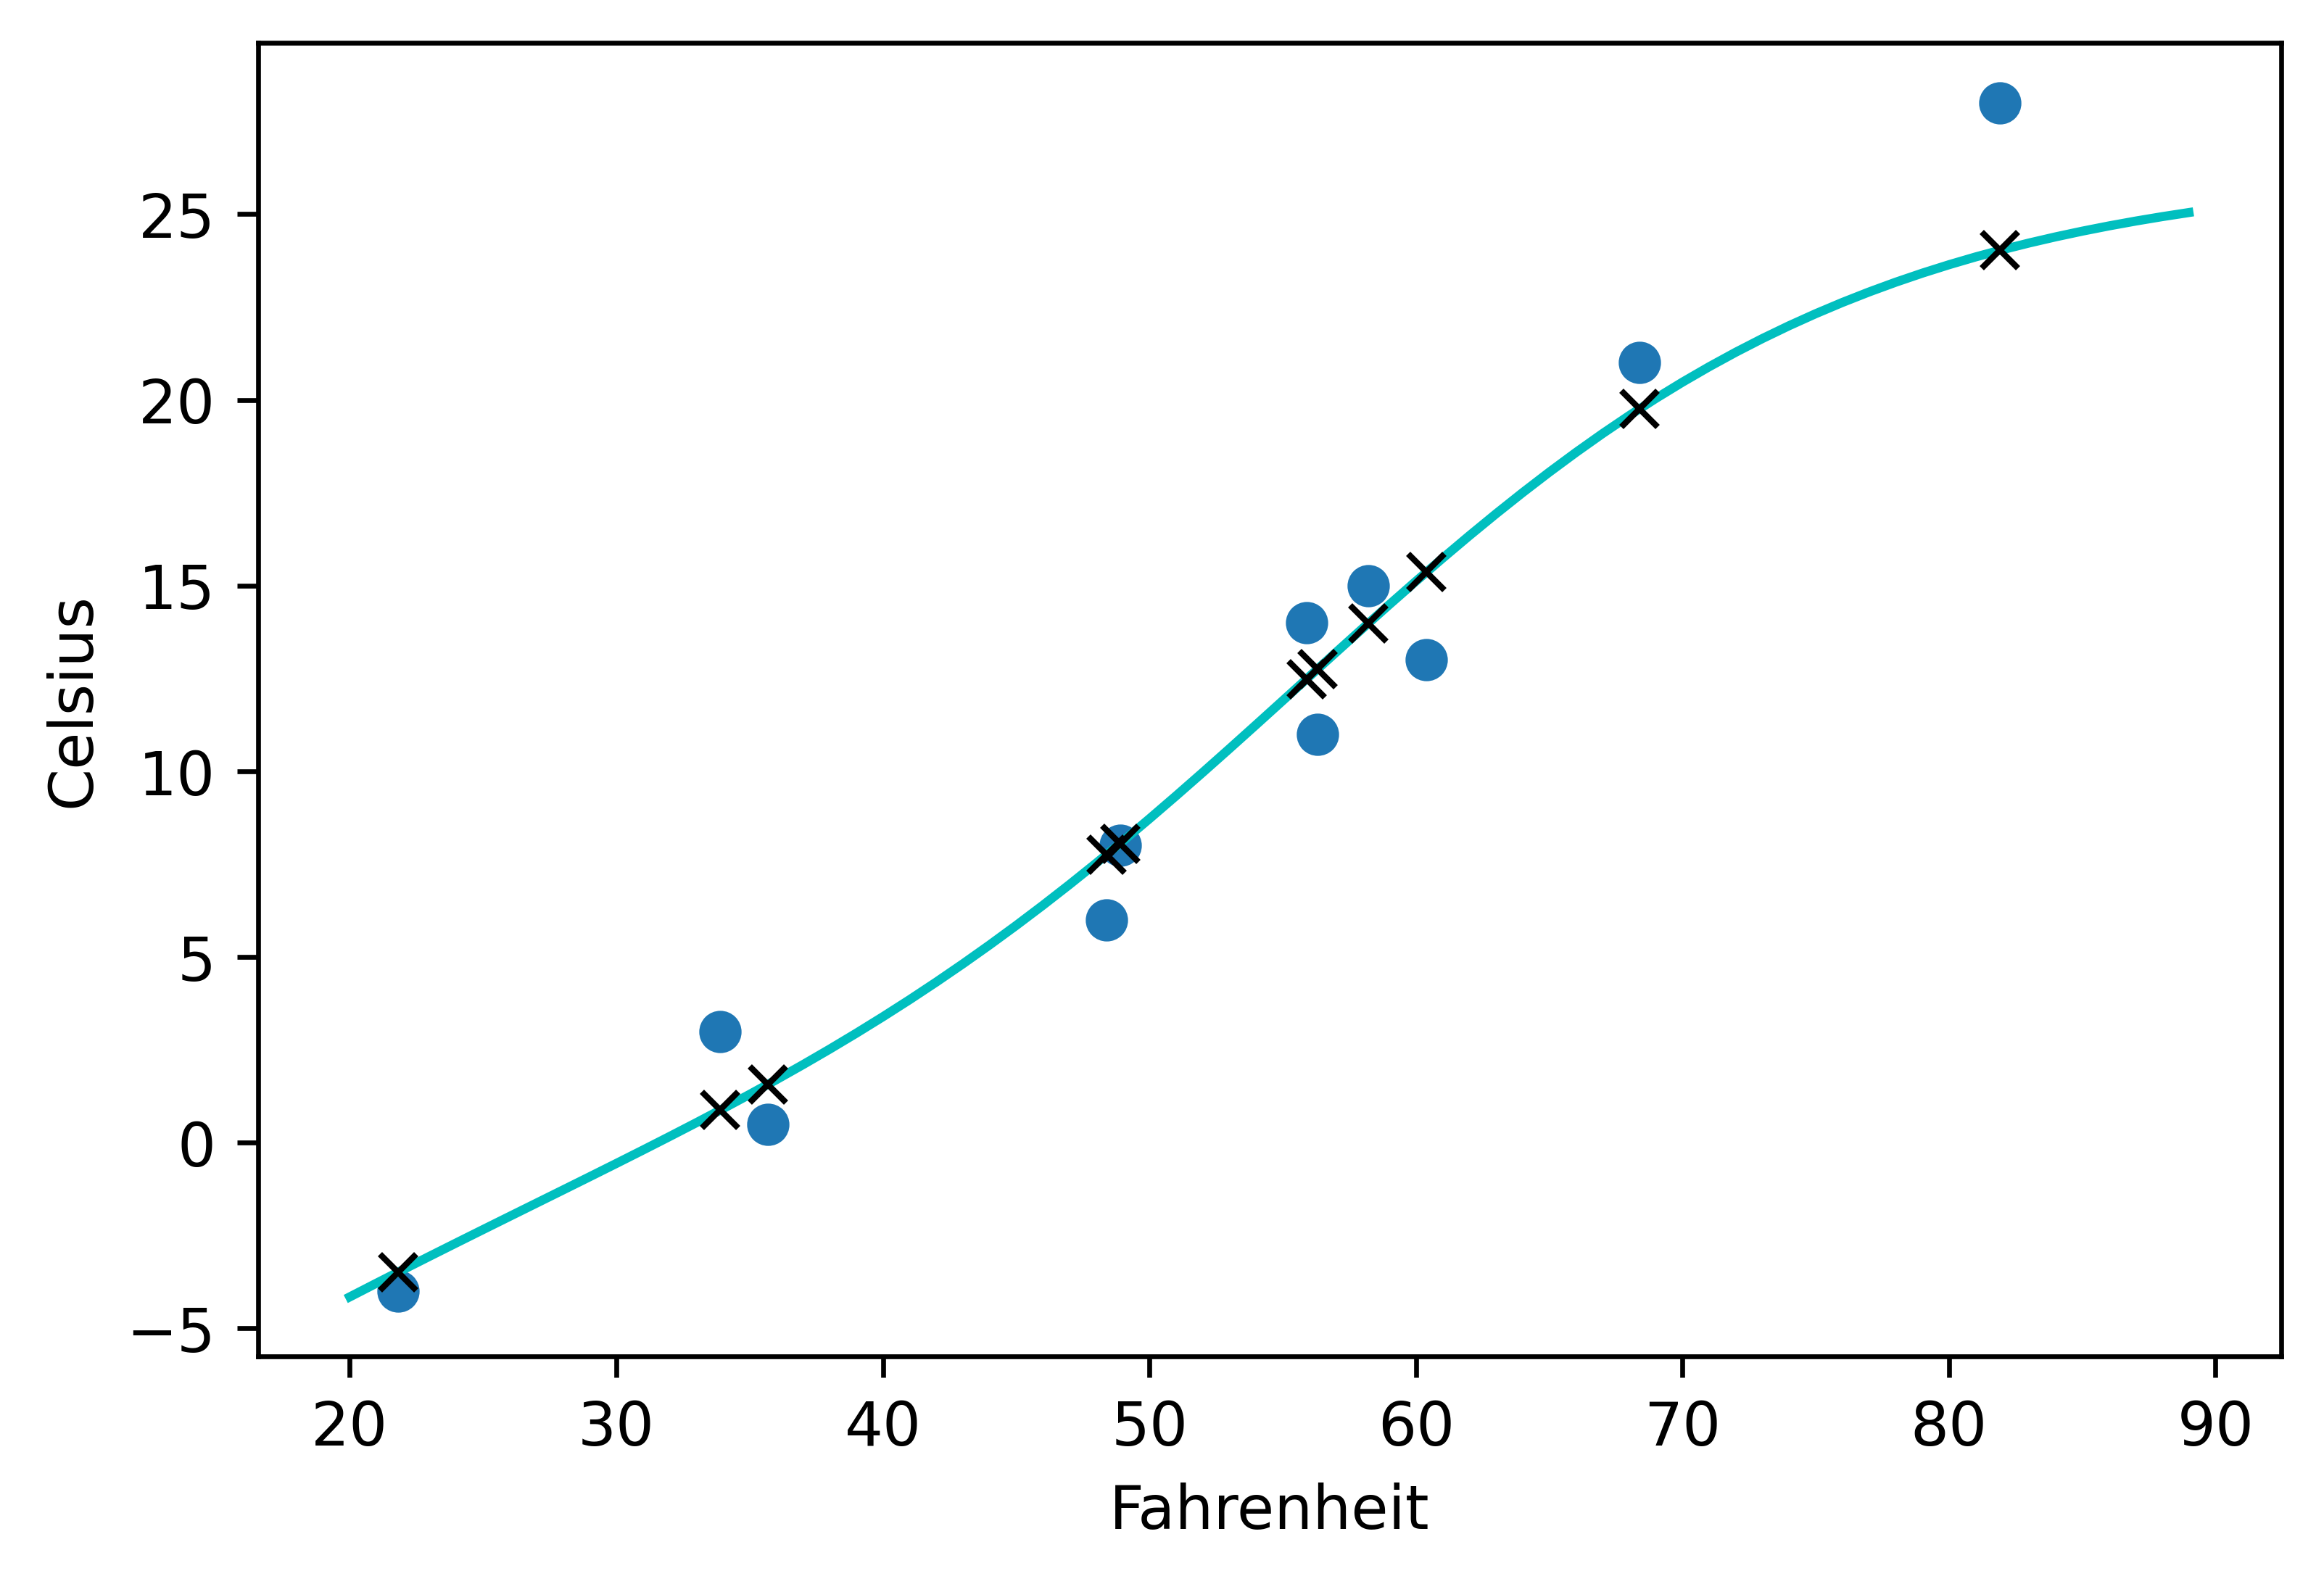

In [155]:
from turtle import bgcolor
import matplotlib.pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600, facecolor='white')

plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')
plt.show()